## Observations and Insights 

In [36]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
path_mouse_metadata = "data/Mouse_metadata.csv"
path_study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(path_mouse_metadata)
study_results = pd.read_csv(path_study_results)

# Combine the data into a single dataset
merged_data_df = study_results.merge(mouse_metadata,)
# Display the data table for preview

merged_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [37]:
# Checking the number of mice.
num_mice = len(pd.unique(merged_data_df['Mouse ID']))

num_mice

249

In [38]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Optional: Get all the data for the duplicate mouse ID. 
mouse_counts = merged_data_df['Mouse ID'].value_counts()
dupemouse = mouse_counts.index[0]

#return the duped mouse's ID
dupemouse

'g989'

In [93]:
#show the duped mouse's dataframe
duped_df = merged_data_df.loc[lambda merged_data_df: merged_data_df['Mouse ID']==dupemouse]
                              
duped_df

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)


In [40]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#first set the multi-index of the merged dataframe
merged_data_df.set_index(['Mouse ID','Drug Regimen'],inplace=True)

#remove all values that use the duped mouse's ID
merged_data_df.drop(labels=dupemouse,level=0, inplace=True)

#verify that the dupelicated mouse was removed
dupemouse in merged_data_df.index

False

In [41]:
# Checking the number of mice in the clean DataFrame.
num_mice = len(pd.unique(merged_data_df.index.levels[0]))

num_mice

249

In [42]:
#show the new table
merged_data_df.head(10)
#reset the dataframes index for manipulation post-display
merged_data_df.reset_index(inplace=True)

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and Standard Error of Mean of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.


#pull the relevant columns out of the clean dataframe
tumor_volume_df = merged_data_df[['Drug Regimen','Tumor Volume (mm3)']]
grouped_drugs = tumor_volume_df.groupby(['Drug Regimen'])

#generate the values
means =  grouped_drugs['Tumor Volume (mm3)'].mean()
medians = grouped_drugs['Tumor Volume (mm3)'].median()
variance = grouped_drugs['Tumor Volume (mm3)'].var()
stdev = grouped_drugs['Tumor Volume (mm3)'].std()
sem = grouped_drugs['Tumor Volume (mm3)'].sem()

#create the dataframe
summ_stat_drug = {'Mean':means,
                 'Median':medians,
                 'Variance':variance,
                 'STDev':stdev,
                 'SEM':sem}
summary_df = pd.DataFrame(summ_stat_drug)

#print the dataframe
summary_df

,Mean,Median,Variance,STDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [44]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line
summary_df = merged_data_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})

#print the dataframe
summary_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [70]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
import numpy as np

<AxesSubplot:xlabel='Drug Regimen'>

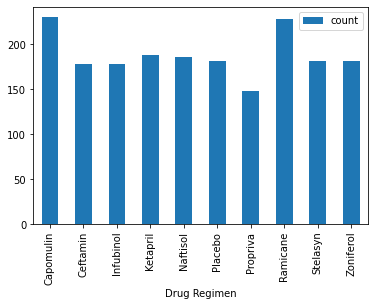

In [71]:
#pull the relevant data
summary_timepoint_df = merged_data_df.groupby(['Drug Regimen']).agg({'Timepoint':['count']})
summary_timepoint_df.reset_index(inplace=True)
#plot the data
summary_timepoint_df.plot(x='Drug Regimen',y='Timepoint',kind='bar')

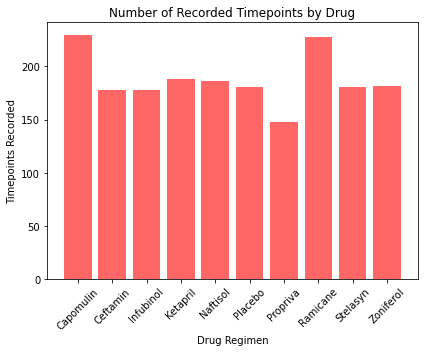

In [133]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
#establish variables to define the plot space
x_axis = np.arange(len(summary_timepoint_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6,5))

#put the data into the plot
plt.bar(x_axis, summary_timepoint_df['Timepoint']['count'],color='r',alpha=.6)

#label the plot
plt.title("Number of Recorded Timepoints by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints Recorded")
plt.xticks(tick_locations, summary_timepoint_df['Drug Regimen'], rotation=45)
plt.tight_layout()
plt.show()

array([<AxesSubplot:ylabel='(Mouse ID, count)'>], dtype=object)

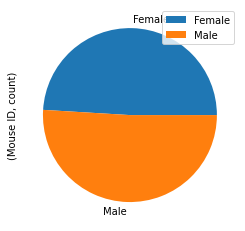

In [140]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
summary_sex_df = merged_data_df.groupby(['Sex']).agg({'Mouse ID':['count']})

summary_sex_df.plot(kind='pie',subplots=True)

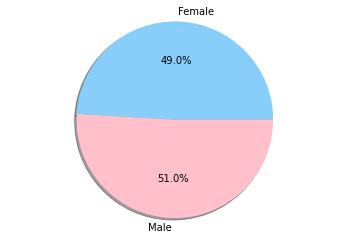

In [149]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(summary_sex_df['Mouse ID']['count'],labels=summary_sex_df.index, colors=['lightskyblue','pink'],
        autopct="%1.1f%%", shadow=True)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
#print the final product to the screen
plt.show()

# Quartiles, Outliers and Boxplots

In [210]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mousepoint = merged_data_df.groupby(['Mouse ID']).agg({'Timepoint':['max']})
mousepoint.columns = mousepoint.columns.droplevel(1)

,Timepoint
Mouse ID,
a203,45
a251,45
a262,45
a275,45
a366,30
...,...
z435,10
z578,45
z581,45


In [213]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mousepoint_2 = pd.merge(mousepoint, merged_data_df,how='left',left_on=['Mouse ID','Timepoint'],right_on=['Mouse ID','Timepoint'])

mousepoint_2

,Mouse ID,Timepoint,Drug Regimen,Tumor Volume (mm3),Metastatic Sites,Sex,Age_months,Weight (g)
0,a203,45,Infubinol,67.973419,2,Female,20,23
1,a251,45,Infubinol,65.525743,1,Female,21,25
2,a262,45,Placebo,70.717621,4,Female,17,29
3,a275,45,Ceftamin,62.999356,3,Female,20,28
4,a366,30,Stelasyn,63.440686,1,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,48.710661,0,Female,12,26
244,z578,45,Ramicane,30.638696,0,Male,11,16
245,z581,45,Infubinol,62.754451,3,Female,24,25
246,z795,45,Naftisol,65.741070,3,Female,13,29


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across the four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
